## Read Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_surabaya = pd.read_excel("../dataset/kotasurabaya.xlsx")

In [4]:
df_surabaya.head()

,Tahun,Jumlah
0,2001,2.616
1,2002,2.633
2,2003,2.651
3,2004,2.667
4,2005,2.684


In [5]:
df_surabaya.describe()

,Tahun,Jumlah
count,23.00000,23.000000
mean,2012.00000,2.785913
std,6.78233,0.093433
min,2001.00000,2.616000
25%,2006.50000,2.709500
50%,2012.00000,2.805000
75%,2017.50000,2.874000
max,2023.00000,2.896000


In [6]:
df_surabaya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tahun   23 non-null     int64  
 1   Jumlah  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 500.0 bytes


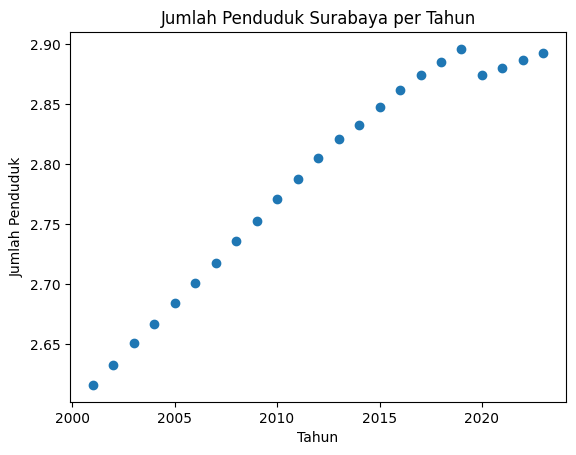

In [8]:
plt.scatter(df_surabaya['Tahun'], df_surabaya['Jumlah'])
plt.title('Jumlah Penduduk Surabaya per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')
plt.show()


## Buat Variabe Independent & Dependent

In [10]:
x = df_surabaya.iloc[:, [0]].values  # Tahun
y = df_surabaya.iloc[:, [1]].values  # Jumlah Penduduk

In [11]:
y

array([[2.616],
       [2.633],
       [2.651],
       [2.667],
       [2.684],
       [2.701],
       [2.718],
       [2.736],
       [2.753],
       [2.771],
       [2.788],
       [2.805],
       [2.821],
       [2.833],
       [2.848],
       [2.862],
       [2.874],
       [2.885],
       [2.896],
       [2.874],
       [2.88 ],
       [2.887],
       [2.893]])

## Split Train & Test

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Training Regresi -- Prediksi

In [13]:
from sklearn.linear_model import LinearRegression
regresi = LinearRegression()

In [14]:
regresi.fit(x_train, y_train)

LinearRegression()

## Testing Regresi -- Prediksi

In [15]:
y_prediksi = regresi.predict(x_test)

In [16]:
y_prediksi

array([[2.78756238],
       [2.77360234],
       [2.92716274],
       [2.82944249],
       [2.9132027 ],
       [2.64796201]])

## Evaluasi Model

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

MAE = mean_absolute_error(y_test, y_prediksi)
print("Mean Absolute Error:", MAE)
r2 = r2_score(y_test, y_prediksi)
print("R-squared:", r2)

Mean Absolute Error: 0.023120042298396298
R-squared: 0.913847904311859


## Prediksi data baru

In [ ]:
data_baru = pd.read_excel("../dataset/datatestprediksi.xlsx")

In [19]:
prediksi_baru = regresi.predict(data_baru)
prediksi_baru

C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[2.95508281],
       [2.96904285],
       [2.98300288],
       [2.99696292]])

## Visualisasi data

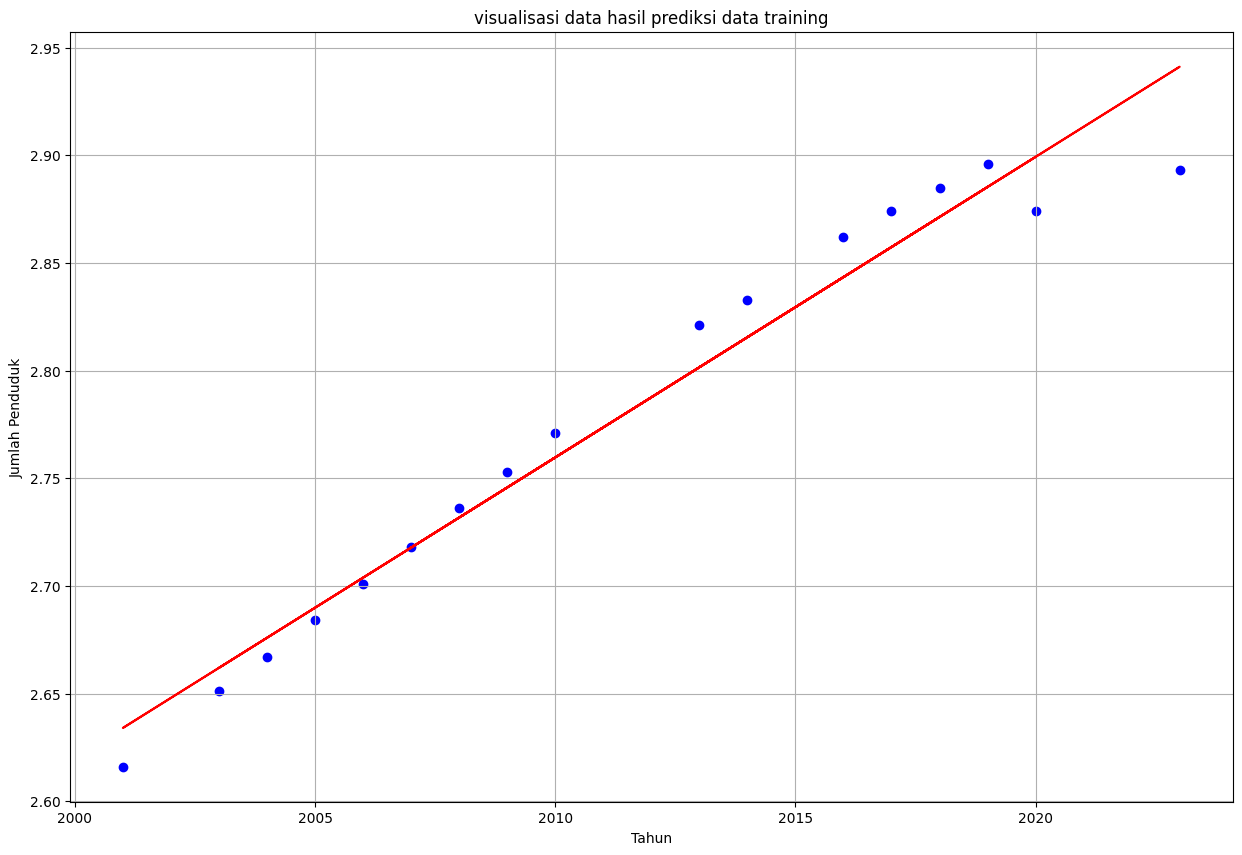

In [22]:
# Visualisasi data hasil prediksi data training
plt.figure(figsize=(15, 10))
plt.title('visualisasi data hasil prediksi data training')

# data training observasi
plt.scatter(x_train, y_train, color='blue')

# garis data hasil prediksi dari data training
plt.plot(x_train, regresi.predict(x_train), color='red')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')
plt.grid(True)
plt.show()

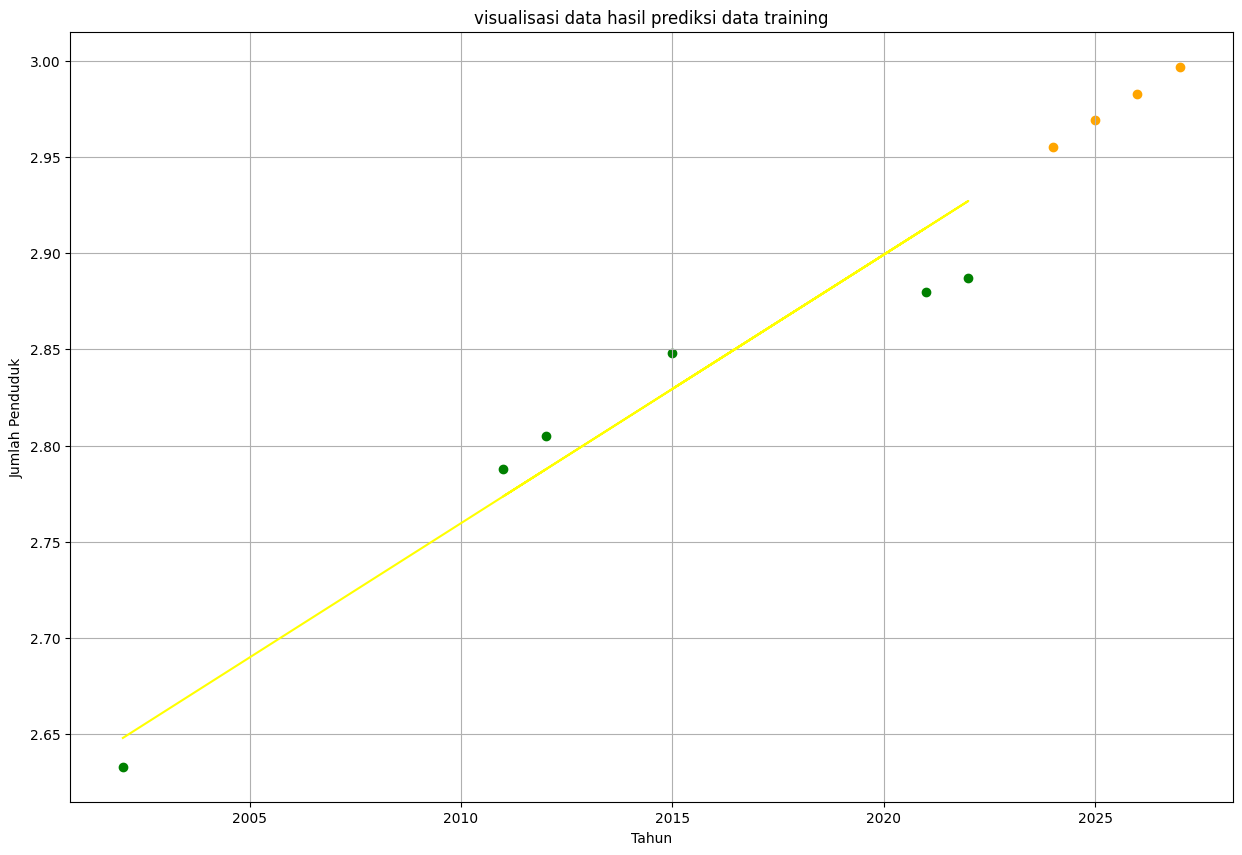

In [24]:
# Visualisasi data hasil prediksi data testing
plt.figure(figsize=(15, 10))
plt.title('visualisasi data hasil prediksi data training')

# data training observasi
plt.scatter(x_test, y_test, color='green')

# garis data hasil prediksi dari data testing
plt.plot(x_test, y_prediksi, color='yellow')

# hasil prediksi data baru
plt.scatter(data_baru, prediksi_baru, color='orange')

plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')
plt.grid(True)
plt.show()